## 上证50成分股交易期整体表现

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import config
from utils.backtest import backtest_stats, backtest_plot, get_baseline

c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [5]:
class tic():
    #类变量:
    tic_dict={'浦发银行':'600000.SH','上海机场':'600009.SH','民生银行':'600016.SH',\
              '中国石化':'600028.SH','中信证券':'600030.SH','三一重工':'600031.SH',\
              '招商银行':'600036.SH','保利发展':'600048.SH','中国联通':'600050.SH',\
              '上汽集团':'600104.SH','复星医药':'600196.SH','恒瑞医药':'600276.SH',\
              '万华化学':'600309.SH','通威股份':'600438.SH','贵州茅台':'600519.SH',\
              '山东黄金':'600547.SH','恒生电子':'600570.SH','海螺水泥':'600585.SH',\
              '用友网络':'600588.SH','海尔智家':'600690.SH','三安光电':'600703.SH',\
              '文泰科技':'600745.SH','山西汾酒':'600809.SH','海通证券':'600837.SH',\
              '伊利股份':'600887.SH','航发动力':'600893.SH','中泰证券':'600918.SH',\
              '隆基股份':'601012.SH','中信建投':'601066.SH','中国神华':'601088.SH',\
              '工业富联':'601138.SH','兴业银行':'601166.SH','国泰君安':'601211.SH',\
              '农业银行':'601288.SH','中国平安':'601318.SH','新华保险':'601336.SH',\
              '工商银行':'601398.SH','中国太保':'601601.SH','中国人寿':'601628.SH',\
              '中国建筑':'601668.SH','华泰证券':'601688.SH','光大银行':'601818.SH',\
              '中国石油':'601857.SH','中国中免':'601888.SH','紫金矿业':'601899.SH',\
              '中金公司':'601995.SH','药明康德':'603259.SH','海天味业':'603288.SH',\
              '韦尔股份':'603501.SH','兆易创新':'603986.SH'}
    trade=pd.read_csv("./learn/data_file/trade.csv")
    root_path = 'D:\work\毕业设计\毕业设计\工作代码\StockRL-main-luochuan\StockRL-main-2\learn\\trade_file'
    def __init__(self):
        pass
    def get_tic_close(self,tic_name):
        tic_code=tic.tic_dict[tic_name]
        tradedata=tic.trade[tic.trade['tic']==tic_code][['date','close']].reset_index(drop=True)
        tradedata['close']=tradedata['close'].apply(lambda x:np.nan if x==0 else x)
        tradedata=tradedata.fillna(method='ffill')
        return tradedata
    def get_all_tic_close(self):
        all_price=tic.trade.pivot_table(index = 'date',columns = 'tic', values = 'close')
        all_price=all_price.mean()
        return all_price
    def cate_by_close(self):##按照股票价格将股票分组
        ##根据股票平均价格，将股票按价格标准分类:10以下，10-20，20-30,30-40,40-50,50-100，100以上，茅台五类
        all_price=tic.trade[['date','tic','close']]
        all_tic=all_price.groupby('tic').agg('mean')
        tic1=list(all_tic[all_tic['close']<10].index)
        tic2=list(all_tic[(all_tic['close']>=10) &(all_tic['close']<20)].index)
        tic3=list(all_tic[(all_tic['close']>=20) &(all_tic['close']<30)].index)
        tic4=list(all_tic[(all_tic['close']>=30) &(all_tic['close']<40)].index)
        tic5=list(all_tic[(all_tic['close']>=40) &(all_tic['close']<50)].index)
        tic6=list(all_tic[(all_tic['close']>=50)&(all_tic['close']<100)].index)
        tic7=list(all_tic[(all_tic['close']>=100)&(all_tic['close']<1500)].index)
        tic8=['600519.SH']
        tic_cate=[tic1,tic2,tic3,tic4,tic5,tic6,tic7,tic8]
        tic_dict_reverse={}
        tic_keys=list(tic.tic_dict.keys())
        tic_values=list(tic.tic_dict.values())
        for i in range(len(tic_keys)):
            tic_dict_reverse[tic_values[i]]=tic_keys[i]
        for i in range(len(tic_cate)):
            for j in range(len(tic_cate[i])):
                tic_cate[i][j]=tic_dict_reverse[tic_cate[i][j]]
        return tic_cate
    def _plot(self,tic_name,begin_date='2020-01-01',end_date='2021-12-31'):
         df_plot=self.get_tic_close(tic_name)
         df_plot = df_plot[(df_plot['date']<end_date) &(df_plot['date']>begin_date) ]
         plot_df = df_plot.loc[:,['date','close']].reset_index()
         config = {
                    "font.family":'serif',
                    "font.size": 20,
                    "mathtext.fontset":'stix',
                    "font.serif": ['SimSun'],
                    }
         plt.rcParams.update(config)
         plt.plot(plot_df.index, plot_df['close'],label=tic_name)
         plt.xlabel('Trade Date', fontdict={'color': 'black',
                             'family': 'Times New Roman',
                             'weight': 'normal',
                             'size': 20})
         plt.ylabel('Close', fontdict={'color': 'black',
                          'family': 'Times New Roman',
                          'weight': 'normal',
                          'size': 20})
         plt.xticks(fontproperties='Times New Roman',size=16)
         plt.yticks(fontproperties='Times New Roman',size=16)
    def plot_all(self,tic_list,filename):
        plt.figure(figsize=(20,10))
        for i in range(len(tic_list)):
            self._plot(tic_list[i])
        plt.legend(prop={'family':'serif','size':20})
        plt.savefig(f'./assets/all_stock_close_{filename}.jpg',bbox_inches='tight')
        plt.show()
    def plot_by_cate(self):#按照收盘价分组对股票曲线进行绘制
        tic_cate=self.cate_by_close()
        for i in range(len(tic_cate)):
            self.plot_all(tic_cate[i],i)
    def get_performance(self,tic_name):
        baseline_df = self.get_tic_close(tic_name)
        baseline_stats = backtest_stats(baseline_df, value_col_name='close')
        return baseline_stats
    def get_all_performance(self):
        df_list=[]
        for i in tic.tic_dict.keys():
            df=self.get_performance(i)
            df_list.append(df)
        df0=pd.concat(df_list,axis=1,ignore_index=True)
        df0.columns=list(tic.tic_dict.values())
        df0=df0.T
        return df0
    def get_tic_dict(self):
        k=list(tic.tic_dict.keys())
        v=list(tic.tic_dict.values())
        dic={'股票名称':k,'股票代码':v}
        df=pd.DataFrame(dic)
        return df

In [6]:
a=tic()

In [137]:
df=a.get_tic_dict()

In [141]:
df.to_csv('tic_name.csv',index=False)

In [7]:
df=a.get_all_performance()

Annual return         -0.133999
Cumulative returns    -0.242296
Annual volatility      0.200729
Sharpe ratio          -0.618142
Calmar ratio          -0.526495
Stability              0.239307
Max drawdown          -0.254512
Omega ratio            0.891167
Sortino ratio         -0.882771
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.000811
Daily value at risk   -0.025782
dtype: float64
Annual return         -0.226292
Cumulative returns    -0.390305
Annual volatility      0.372728
Sharpe ratio          -0.502811
Calmar ratio          -0.417606
Stability              0.634101
Max drawdown          -0.541880
Omega ratio            0.915671
Sortino ratio         -0.697743
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.108599
Daily value at risk   -0.047703
dtype: float64
Annual return         -0.179614
Cumulative returns    -0.317382
Annual volatility      0.148842
Sharpe ratio          -1.258290
Calmar rat

dtype: float64
Annual return          0.166939
Cumulative returns     0.346812
Annual volatility      0.544093
Sharpe ratio           0.553643
Calmar ratio           0.323418
Stability              0.065597
Max drawdown          -0.516169
Omega ratio            1.101272
Sortino ratio          0.861686
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.341038
Daily value at risk   -0.067354
dtype: float64
Annual return          1.307166
Cumulative returns     4.014450
Annual volatility      0.521507
Sharpe ratio           1.869943
Calmar ratio           3.008922
Stability              0.884201
Max drawdown          -0.434430
Omega ratio            1.385806
Sortino ratio          2.827458
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.096467
Daily value at risk   -0.061834
dtype: float64
Annual return         -0.098320
Cumulative returns    -0.180941
Annual volatility      0.305324
Sharpe ratio          -0.18

Annual return          0.464187
Cumulative returns     1.086242
Annual volatility      0.557267
Sharpe ratio           0.963588
Calmar ratio           1.215549
Stability              0.679865
Max drawdown          -0.381874
Omega ratio            1.177833
Sortino ratio          1.464731
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.129919
Daily value at risk   -0.068078
dtype: float64
Annual return          0.266465
Cumulative returns     0.577098
Annual volatility      0.572153
Sharpe ratio           0.698692
Calmar ratio           0.537805
Stability              0.058550
Max drawdown          -0.495468
Omega ratio            1.126124
Sortino ratio          1.048741
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.137077
Daily value at risk   -0.070498
dtype: float64


In [5]:
df

,Annual return,Cumulative returns,Annual volatility,Sharpe ratio,Calmar ratio,Stability,Max drawdown,Omega ratio,Sortino ratio,Skew,Kurtosis,Tail ratio,Daily value at risk
600000.SH,-0.133999,-0.242296,0.200729,-0.618142,-0.526495,0.239307,-0.254512,0.891167,-0.882771,NaN,NaN,1.000811,-0.025782
600009.SH,-0.226292,-0.390305,0.372728,-0.502811,-0.417606,0.634101,-0.541880,0.915671,-0.697743,NaN,NaN,1.108599,-0.047703
600016.SH,-0.179614,-0.317382,0.148842,-1.258290,-0.529442,0.843469,-0.339252,0.783287,-1.718903,NaN,NaN,0.961692,-0.019496
600028.SH,-0.037776,-0.071574,0.220059,-0.065837,-0.157031,0.126244,-0.240563,0.988048,-0.096150,NaN,NaN,1.001221,-0.027782
600030.SH,0.035667,0.069924,0.340167,0.271797,0.113239,0.002824,-0.314969,1.051663,0.417582,NaN,NaN,1.177573,-0.042490
600031.SH,0.155835,0.322207,0.439189,0.548178,0.290225,0.325029,-0.536947,1.097273,0.842352,NaN,NaN,1.167596,-0.054377
600036.SH,0.156895,0.324545,0.315055,0.619908,0.612651,0.807155,-0.256091,1.110810,0.962615,NaN,NaN,1.297573,-0.038918
600048.SH,0.041016,0.080606,0.363099,0.289864,0.091353,0.142981,-0.448977,1.051646,0.470591,NaN,NaN,1.335366,-0.045328
600050.SH,-0.182653,-0.322250,0.227152,-0.775821,-0.525294,0.860089,-0.347716,0.865034,-1.094705,NaN,NaN,1.084446,-0.029318
600104.SH,-0.038525,-0.072967,0.375693,0.080984,-0.115715,0.056881,-0.332926,1.014527,0.125207,NaN,NaN,1.183299,-0.047212


In [115]:
df.to_csv('all_tic.csv')

In [8]:
cu=df.sort_values(by='Cumulative returns',ascending=False).reset_index()

In [10]:
cu.to_csv('cu.csv')

In [8]:
#按累积收益率排序,累积收益率越高，越适合长期持有
#用基线卡阈值，小于等于25为表现更优
cumu_return=df.sort_values(by='Cumulative returns',ascending=False)
cumu_return=cumu_return.reset_index()
cumu_return=cumu_return['index']
cumu_rank=list(cumu_return.values)
cumu_rank

['600809.SH',
 '601012.SH',
 '600438.SH',
 '600893.SH',
 '601888.SH',
 '603259.SH',
 '601899.SH',
 '603501.SH',
 '600703.SH',
 '600309.SH',
 '600519.SH',
 '600196.SH',
 '600918.SH',
 '603986.SH',
 '600588.SH',
 '600690.SH',
 '603288.SH',
 '601088.SH',
 '600570.SH',
 '600887.SH',
 '600745.SH',
 '600036.SH',
 '600031.SH',
 '601995.SH',
 '600048.SH',
 '600030.SH',
 '601166.SH',
 '601211.SH',
 '601066.SH',
 '600028.SH',
 '600104.SH',
 '601668.SH',
 '601688.SH',
 '601857.SH',
 '601628.SH',
 '601288.SH',
 '601398.SH',
 '601818.SH',
 '600276.SH',
 '600837.SH',
 '601336.SH',
 '600547.SH',
 '600585.SH',
 '601601.SH',
 '600000.SH',
 '600016.SH',
 '600050.SH',
 '601138.SH',
 '601318.SH',
 '600009.SH']

In [9]:
#按夏普比率排序，越高，越适合长期持有,小于等于25
sharpe=df.sort_values(by='Sharpe ratio',ascending=False)
sharpe=sharpe.reset_index()
sharpe=sharpe['index']
sharpe_rank=list(sharpe.values)
sharpe_rank

['600809.SH',
 '601012.SH',
 '600438.SH',
 '600893.SH',
 '600519.SH',
 '601888.SH',
 '603259.SH',
 '601899.SH',
 '600309.SH',
 '603501.SH',
 '600703.SH',
 '600196.SH',
 '600918.SH',
 '603288.SH',
 '600690.SH',
 '601088.SH',
 '601995.SH',
 '600588.SH',
 '603986.SH',
 '600570.SH',
 '600887.SH',
 '600036.SH',
 '600745.SH',
 '600031.SH',
 '600048.SH',
 '600030.SH',
 '601166.SH',
 '601066.SH',
 '601211.SH',
 '600104.SH',
 '601628.SH',
 '601688.SH',
 '600028.SH',
 '601668.SH',
 '601857.SH',
 '600276.SH',
 '601336.SH',
 '600547.SH',
 '600837.SH',
 '600585.SH',
 '601601.SH',
 '601818.SH',
 '601398.SH',
 '601138.SH',
 '601288.SH',
 '600009.SH',
 '600000.SH',
 '601318.SH',
 '600050.SH',
 '600016.SH']

In [10]:
#按最大回撤排序，越小，越适合控制风险，作为防御性资产，小于等于5
drawdown=df.sort_values(by='Max drawdown',ascending=False)
drawdown=drawdown.reset_index()
drawdown=drawdown['index']
drawdown_rank=list(drawdown.values)
drawdown_rank

['601288.SH',
 '601398.SH',
 '601668.SH',
 '601088.SH',
 '601818.SH',
 '600028.SH',
 '600000.SH',
 '600036.SH',
 '601211.SH',
 '600030.SH',
 '601857.SH',
 '600690.SH',
 '600309.SH',
 '600104.SH',
 '603259.SH',
 '600016.SH',
 '601166.SH',
 '600050.SH',
 '600837.SH',
 '601899.SH',
 '601012.SH',
 '600887.SH',
 '603501.SH',
 '600703.SH',
 '601688.SH',
 '600519.SH',
 '600585.SH',
 '601601.SH',
 '600588.SH',
 '600570.SH',
 '600809.SH',
 '601336.SH',
 '601995.SH',
 '600438.SH',
 '600048.SH',
 '601628.SH',
 '601138.SH',
 '603288.SH',
 '600547.SH',
 '601888.SH',
 '601318.SH',
 '603986.SH',
 '600196.SH',
 '600893.SH',
 '600745.SH',
 '600276.SH',
 '600031.SH',
 '600009.SH',
 '601066.SH',
 '600918.SH']

In [11]:
#按年化波动率排序   越小，越适合控制风险，防御，越大，越适合投机赚取波段收益（通威股份，航发动力、兆易创新）,小于等于2
annu_vol=df.sort_values(by='Annual volatility',ascending=True)
annu_vol=annu_vol.reset_index()
annu_vol=annu_vol['index']
vol_rank=list(annu_vol.values)
vol_rank

['601288.SH',
 '600016.SH',
 '601398.SH',
 '600000.SH',
 '600028.SH',
 '601668.SH',
 '600050.SH',
 '601818.SH',
 '601857.SH',
 '601318.SH',
 '601211.SH',
 '600837.SH',
 '601688.SH',
 '601166.SH',
 '600036.SH',
 '600519.SH',
 '600585.SH',
 '601138.SH',
 '600030.SH',
 '600276.SH',
 '601088.SH',
 '600547.SH',
 '600887.SH',
 '601601.SH',
 '601336.SH',
 '600048.SH',
 '600009.SH',
 '600104.SH',
 '603288.SH',
 '600690.SH',
 '601628.SH',
 '600309.SH',
 '600570.SH',
 '600031.SH',
 '601066.SH',
 '603259.SH',
 '600588.SH',
 '601899.SH',
 '601995.SH',
 '600809.SH',
 '600918.SH',
 '601012.SH',
 '600745.SH',
 '601888.SH',
 '600196.SH',
 '603501.SH',
 '600703.SH',
 '603986.SH',
 '600893.SH',
 '600438.SH']

In [12]:
#按calmar比率排序    越大，代表这些资产在控制最大回撤的情况下表现更好,小于等于23
calm=df.sort_values(by='Calmar ratio',ascending=False)
calm=calm.reset_index()
calm=calm['index']
calm_rank=list(calm.values)
calm_rank

['601012.SH',
 '600809.SH',
 '600438.SH',
 '603259.SH',
 '600893.SH',
 '601899.SH',
 '601888.SH',
 '603501.SH',
 '600309.SH',
 '600703.SH',
 '601088.SH',
 '600519.SH',
 '600690.SH',
 '600196.SH',
 '600588.SH',
 '600036.SH',
 '603986.SH',
 '603288.SH',
 '600918.SH',
 '600570.SH',
 '600887.SH',
 '601995.SH',
 '600745.SH',
 '600031.SH',
 '600030.SH',
 '600048.SH',
 '601166.SH',
 '601211.SH',
 '601066.SH',
 '600104.SH',
 '601688.SH',
 '601628.SH',
 '601857.SH',
 '600028.SH',
 '600276.SH',
 '601668.SH',
 '600547.SH',
 '601336.SH',
 '600837.SH',
 '600585.SH',
 '601601.SH',
 '601818.SH',
 '601138.SH',
 '600009.SH',
 '601398.SH',
 '601318.SH',
 '601288.SH',
 '600050.SH',
 '600000.SH',
 '600016.SH']

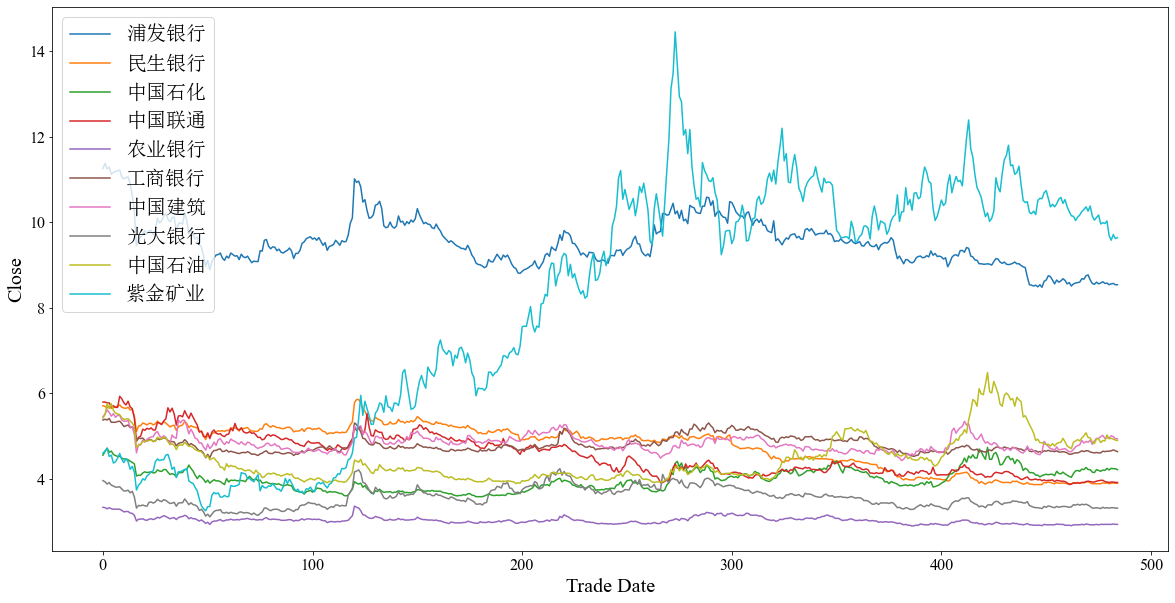

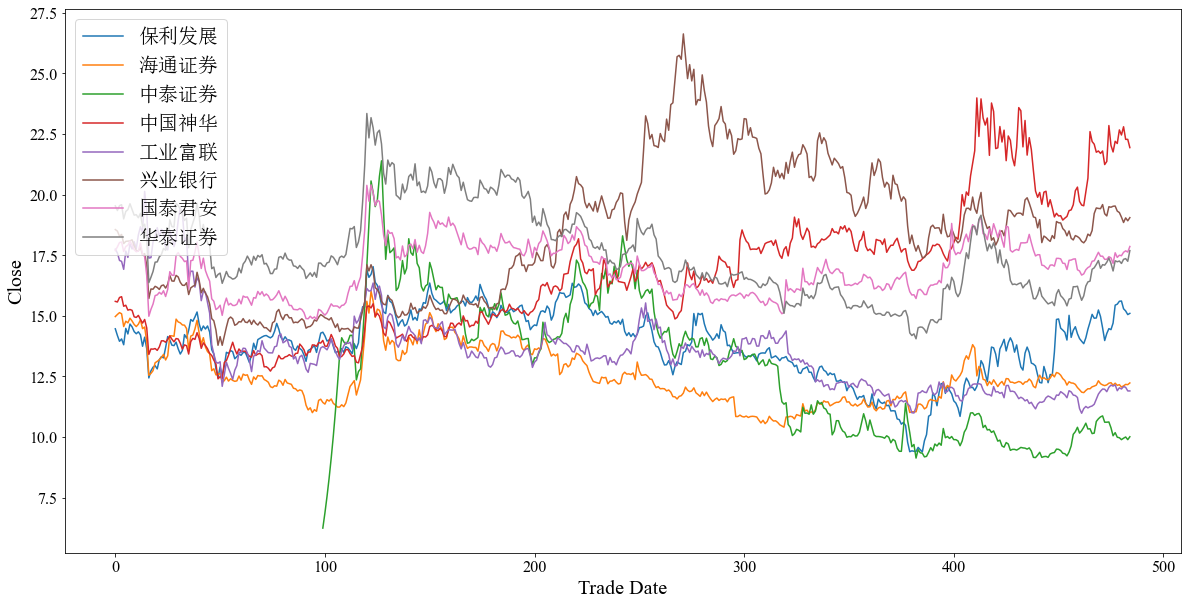

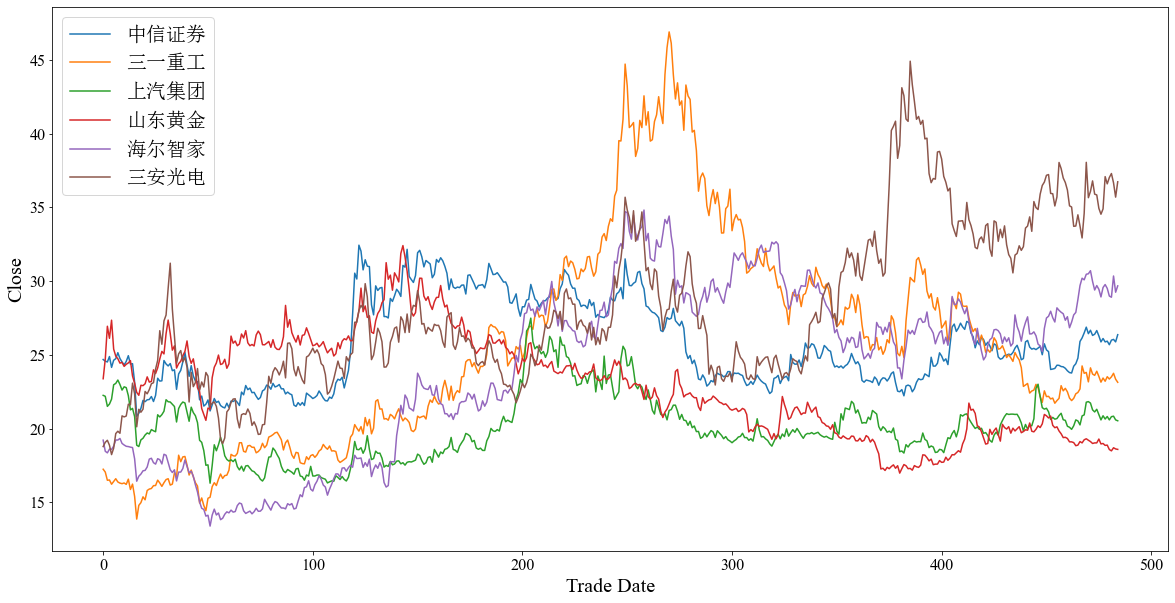

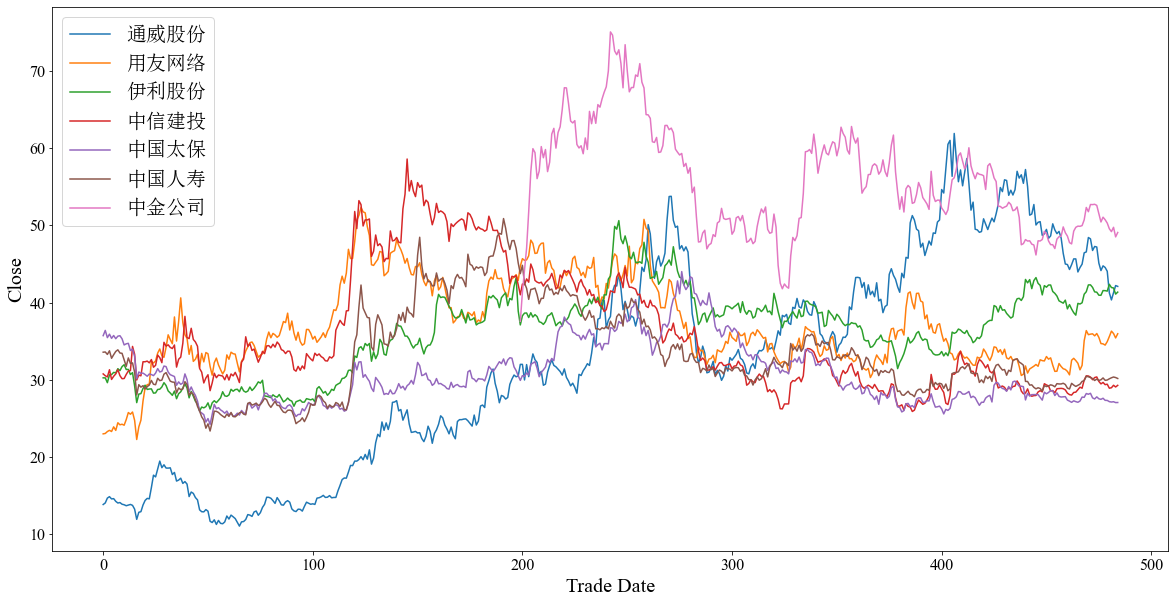

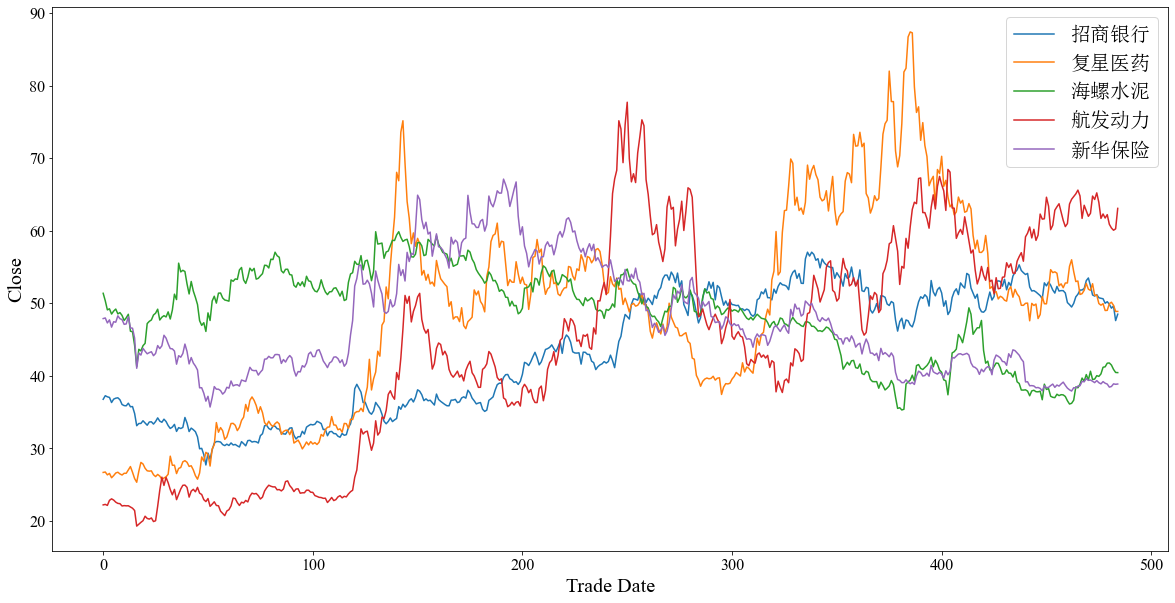

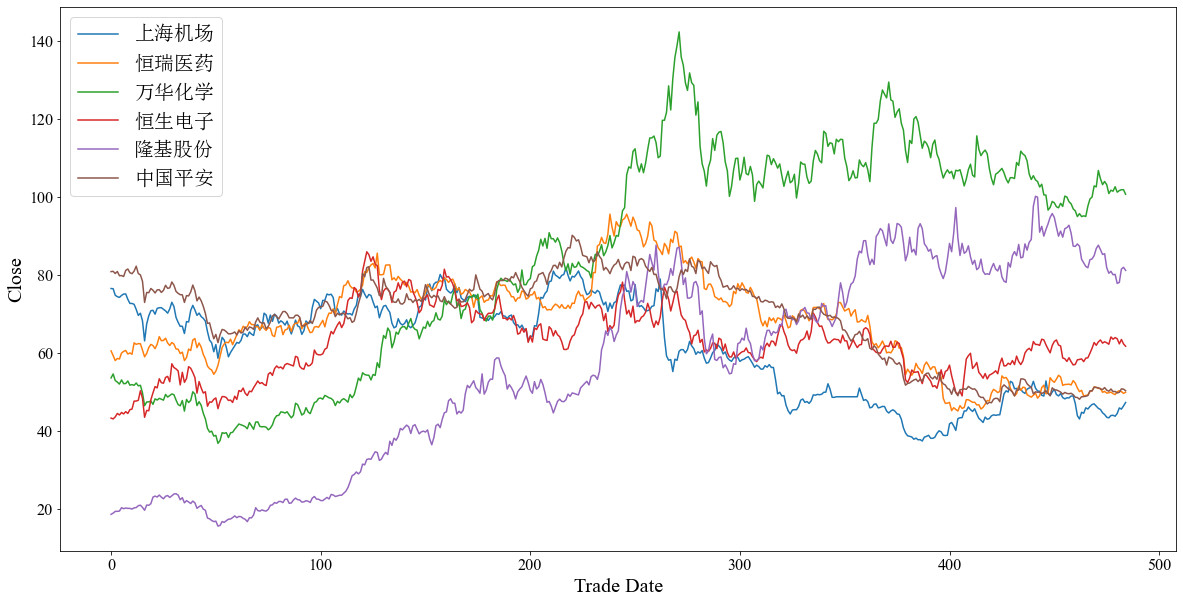

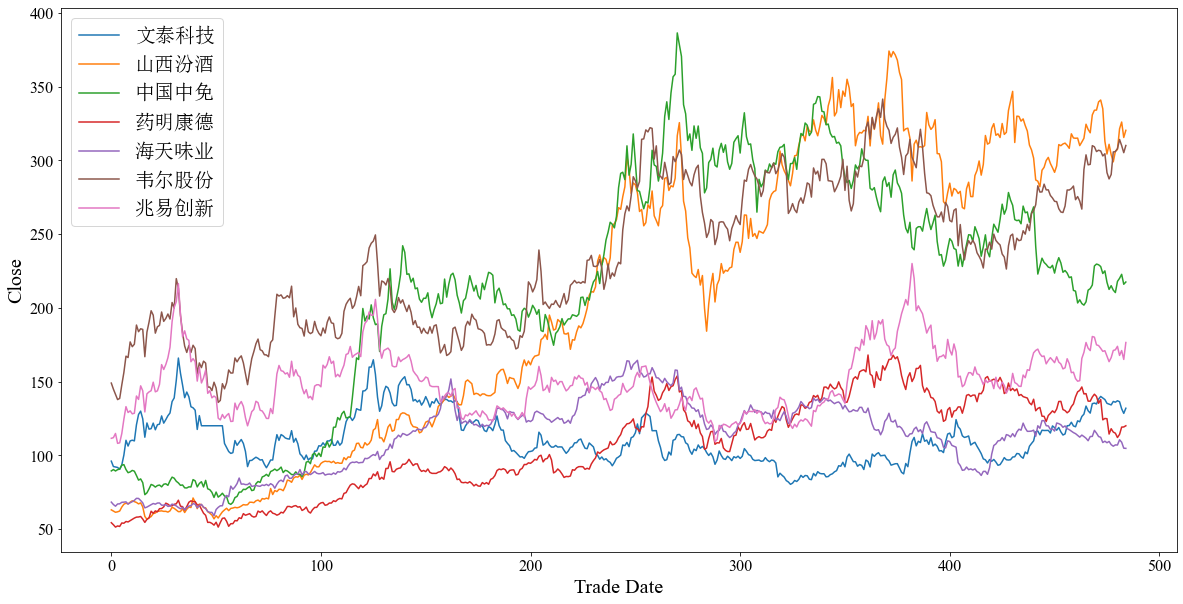

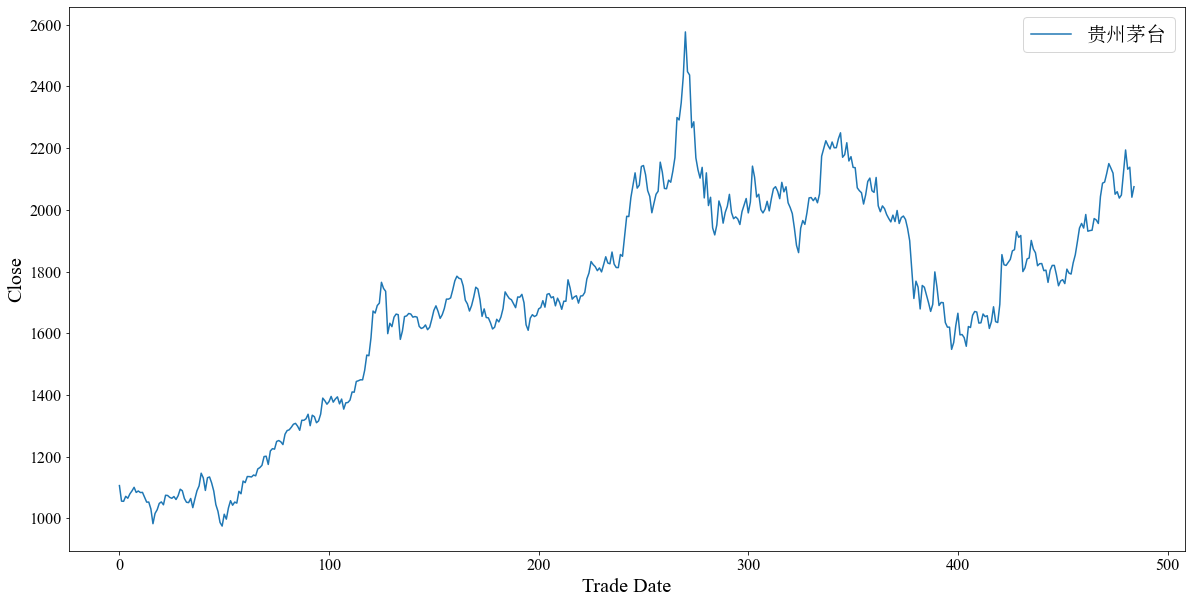

In [105]:
a.plot_by_cate()

## TD3投资组合构成分析

In [1]:
import os
import re
import pandas as pd
from utils import config

In [2]:
root_path = os.getcwd()
root_path = os.path.join(root_path, "learn", "trade_file")
path_dict = {}
for model in config.MODEL_LIST:
    path_dict[model] = os.path.join(root_path, "actions_{}.csv".format(model))
a2c_actions = pd.read_csv(path_dict["a2c"])
ddpg_actions = pd.read_csv(path_dict["ddpg"])
ppo_actions = pd.read_csv(path_dict["ppo"])
sac_actions = pd.read_csv(path_dict["sac"])
td3_actions = pd.read_csv(path_dict["td3"])
actions=td3_actions.loc[0,'actions']
find_float = lambda x: re.findall(r'-?\d+\.\d+|-?\d+',x)
actions_list=find_float(actions)
buy_stock_list=[]
for i in range(len(actions_list)):
    num=float(actions_list[i])
    if num>0:
        buy_stock_list.append(config.SSE_50[i])

In [3]:
buy_stock_list
len(buy_stock_list)

28

In [13]:
##分析资产在交易周期内整体表现评价投资组合构成:
##主要有两部分组成：追求收益+控制风险（最大回撤与年化波动率都小）
cumu=[]
sharpe=[]
drawdown=[]
vol=[]
calm=[]
for tic in buy_stock_list:
    cumu.append(cumu_rank.index(tic))
    sharpe.append(sharpe_rank.index(tic))
    drawdown.append(drawdown_rank.index(tic))
    vol.append(vol_rank.index(tic))
    calm.append(calm_rank.index(tic))
dic={'tic':buy_stock_list,'cumulative returns':cumu,'sharpe ratio':sharpe,'max drawdown':drawdown,'annual volatility':vol,'calmar ratio':calm}
df=pd.DataFrame(dic).set_index('tic')
df=df.sort_values(by='cumulative returns',ascending=True)
df

,cumulative returns,sharpe ratio,max drawdown,annual volatility,calmar ratio
tic,,,,,
600809.SH,0,0,30,39,1
600438.SH,2,2,33,49,2
600893.SH,3,3,43,48,4
601888.SH,4,5,39,43,6
601899.SH,6,7,19,37,5
603501.SH,7,9,22,45,7
600309.SH,9,8,12,31,8
600519.SH,10,4,25,15,11
600196.SH,11,11,42,44,13


In [15]:
df.to_csv('td3_tic.csv')